# 🚓 Crime Count Prediction in Each Area
## 📌 Project Overview

This project focuses on predicting crime counts in different areas using historical crime data. The goal is to analyze past crime patterns and build a model that can estimate crime occurrence levels for each area.

This project combines Exploratory Data Analysis (EDA) with Machine Learning techniques, and specifically uses a Random Forest model to capture complex patterns and improve prediction accuracy

## 📌 Target:

Predict crime count for each area based on historical data.

## 🔍 Project Workflow
## 1️⃣ Data Preprocessing

* Cleaned missing and inconsistent values

* Extracted useful features (Year, Month, Hour, Area)

* Prepared data for modeling

## 2️⃣ Exploratory Data Analysis (EDA)

* Crime count by area

* Crime trends over years

* Monthly and hourly crime distribution

* Geographic crime hotspot visualization

## 📌 Purpose:
To understand crime patterns before prediction.



In [26]:
import pandas as pd  
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [27]:
data = pd.read_csv("cleand_crime.csv")

In [28]:
data.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month,Day,Weekday,Hour
0,0,211507896,04/11/2021 12:00:00 AM,2020-11-07,845,15,N Hollywood,1502,2,354,...,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,2020,11,7,5,8
1,1,201516622,10/21/2020 12:00:00 AM,2020-10-18,1845,15,N Hollywood,1521,1,230,...,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,2020,10,18,6,18
2,2,240913563,12/10/2024 12:00:00 AM,2020-10-30,1240,9,Van Nuys,933,2,354,...,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509,2020,10,30,4,12
3,3,210704711,12/24/2020 12:00:00 AM,2020-12-24,1310,7,Wilshire,782,1,331,...,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747,2020,12,24,3,13
4,4,201418201,10/03/2020 12:00:00 AM,2020-09-29,1830,14,Pacific,1454,1,420,...,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350,2020,9,29,1,18


In [29]:
data.describe()

,Unnamed: 0,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Status,Crm Cd 1,LAT,LON,Year,Month,Day,Weekday,Hour
count,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06
mean,5.031036e+05,2.202494e+08,1.339982e+03,1.069231e+01,1.115687e+03,1.399672e+00,4.997775e+02,8.067693e+01,2.891327e+01,3.055308e+02,2.527294e+00,4.995381e+02,3.407416e+01,-1.183547e+02,2.021882e+03,6.370519e+00,1.534449e+01,3.023610e+00,1.322171e+01
std,2.900991e+05,1.319675e+07,6.513743e+02,6.110136e+00,6.111473e+02,4.898310e-01,2.051349e+02,5.054285e+01,2.199290e+01,2.193037e+02,1.003748e+00,2.049336e+02,1.111570e-01,1.044454e-01,1.315033e+00,3.464177e+00,8.950605e+00,1.987271e+00,6.513336e+00
min,0.000000e+00,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,0.000000e+00,-4.000000e+00,1.010000e+02,0.000000e+00,1.100000e+02,3.370590e+01,-1.186676e+02,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.518435e+05,2.106179e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,2.100000e+01,0.000000e+00,1.010000e+02,3.000000e+00,3.310000e+02,3.401540e+01,-1.184309e+02,2.021000e+03,3.000000e+00,7.000000e+00,1.000000e+00,9.000000e+00
50%,5.036110e+05,2.209175e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,1.050000e+02,3.000000e+01,2.030000e+02,3.000000e+00,4.420000e+02,3.405920e+01,-1.183230e+02,2.022000e+03,6.000000e+00,1.500000e+01,3.000000e+00,1.400000e+01
75%,7.543005e+05,2.311111e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,1.230000e+02,4.400000e+01,5.010000e+02,3.000000e+00,6.260000e+02,3.416490e+01,-1.182740e+02,2.023000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01
max,1.004990e+06,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.390000e+02,1.200000e+02,9.760000e+02,5.000000e+00,9.560000e+02,3.433430e+01,-1.181554e+02,2.025000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01


In [30]:
data.describe()

,Unnamed: 0,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Status,Crm Cd 1,LAT,LON,Year,Month,Day,Weekday,Hour
count,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06,1.002751e+06
mean,5.031036e+05,2.202494e+08,1.339982e+03,1.069231e+01,1.115687e+03,1.399672e+00,4.997775e+02,8.067693e+01,2.891327e+01,3.055308e+02,2.527294e+00,4.995381e+02,3.407416e+01,-1.183547e+02,2.021882e+03,6.370519e+00,1.534449e+01,3.023610e+00,1.322171e+01
std,2.900991e+05,1.319675e+07,6.513743e+02,6.110136e+00,6.111473e+02,4.898310e-01,2.051349e+02,5.054285e+01,2.199290e+01,2.193037e+02,1.003748e+00,2.049336e+02,1.111570e-01,1.044454e-01,1.315033e+00,3.464177e+00,8.950605e+00,1.987271e+00,6.513336e+00
min,0.000000e+00,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,0.000000e+00,-4.000000e+00,1.010000e+02,0.000000e+00,1.100000e+02,3.370590e+01,-1.186676e+02,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.518435e+05,2.106179e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,2.100000e+01,0.000000e+00,1.010000e+02,3.000000e+00,3.310000e+02,3.401540e+01,-1.184309e+02,2.021000e+03,3.000000e+00,7.000000e+00,1.000000e+00,9.000000e+00
50%,5.036110e+05,2.209175e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,1.050000e+02,3.000000e+01,2.030000e+02,3.000000e+00,4.420000e+02,3.405920e+01,-1.183230e+02,2.022000e+03,6.000000e+00,1.500000e+01,3.000000e+00,1.400000e+01
75%,7.543005e+05,2.311111e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,1.230000e+02,4.400000e+01,5.010000e+02,3.000000e+00,6.260000e+02,3.416490e+01,-1.182740e+02,2.023000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01
max,1.004990e+06,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.390000e+02,1.200000e+02,9.760000e+02,5.000000e+00,9.560000e+02,3.433430e+01,-1.181554e+02,2.025000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01


## Extracted from DATE OCC:

In [31]:
# Convert DATE OCC column to datetime
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract month
data['Month'] = data['DATE OCC'].dt.month


In [32]:
# Day of Week
data['DayOfWeek'] = data['DATE OCC'].dt.dayofweek

In [33]:
# Hour of the Day
data['Hour'] = data['TIME OCC'] // 100



## 3️⃣ Model Building

* Selected relevant features

* Split dataset into training and testing sets

* Applied a machine learning model to predict crime count per area

## Crime Count for that area & time

In [34]:
crime_counts = data.groupby(['AREA','Month','DayOfWeek']).size().reset_index(name='CrimeCount')


In [35]:
crime_counts

,AREA,Month,DayOfWeek,CrimeCount
0,1,1,0,946
1,1,1,1,831
2,1,1,2,933
3,1,1,3,836
4,1,1,4,988
...,...,...,...,...
1759,21,12,2,488
1760,21,12,3,460
1761,21,12,4,567
1762,21,12,5,491


### ➡️ Input = [AREA, Month, DayOfWeek]
### ➡️ Output = CrimeCount

In [36]:
# train and split
from sklearn.model_selection import train_test_split

X = crime_counts[['AREA','Month','DayOfWeek']]
y = crime_counts['CrimeCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
X

,AREA,Month,DayOfWeek
0,1,1,0
1,1,1,1
2,1,1,2
3,1,1,3
4,1,1,4
...,...,...,...
1759,21,12,2
1760,21,12,3
1761,21,12,4
1762,21,12,5


In [40]:
y

0       946
1       831
2       933
3       836
4       988
       ... 
1759    488
1760    460
1761    567
1762    491
1763    416
Name: CrimeCount, Length: 1764, dtype: int64

## Train Random Forest Regressor

In [44]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Test the Model

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)


## Predict Crime Count

In [47]:
prediction = rf.predict([[5,8,6]])
print("Predicted Crimes =", prediction[0])


Predicted Crimes = 466.4398333333333


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Feature Importance Plot

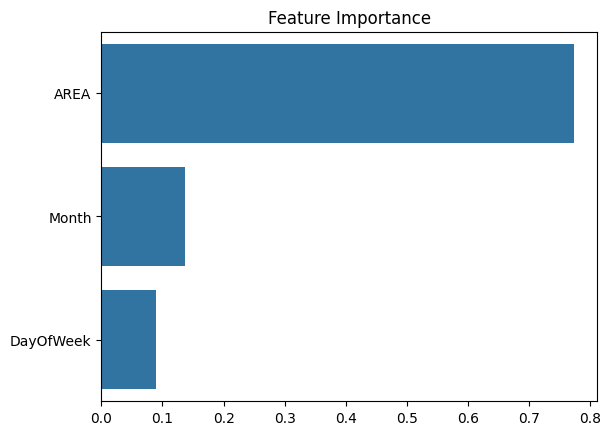

In [48]:
sns.barplot(x=rf.feature_importances_, y=['AREA','Month','DayOfWeek'])
plt.title("Feature Importance")
plt.show()


## 4️⃣ Model Evaluation

* Compared predicted values with actual crime counts

* Evaluated model performance using basic metrics

## 📌 Result:
The model was able to capture general crime trends across areas.

## 📈 Key Insights

* Crime distribution varies significantly between areas

* Certain regions consistently show higher crime counts

* Time and location play an important role in crime prediction

## ⭐ Conclusion

This project demonstrates how historical crime data can be analyzed and used to predict crime counts across different areas. A Random Forest model was used for prediction, leveraging its ability to handle complex, non-linear relationships and reduce overfitting by averaging multiple decision trees. This highlights the importance of EDA and ensemble machine learning in understanding and forecasting crime patterns more accurately.